# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Notebooks/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

In [3]:
A

array([[-0.75421052,  0.67626407],
       [ 0.36985145,  0.88717509],
       [-1.00850658, -0.12473561],
       ...,
       [ 0.29622349, -0.40937241],
       [-0.34930797,  0.30437976],
       [ 0.75259697, -0.67842397]])

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

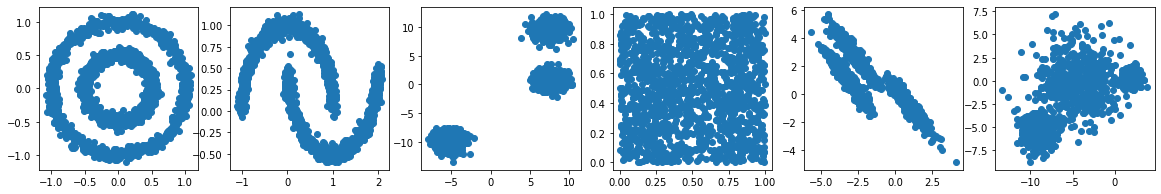

In [4]:
plt.figure(figsize=(20,3))
plt.subplot(1,6,1)
plt.scatter(A[:,0], A[:,1])
plt.subplot(1,6,2)
plt.scatter(B[:,0], B[:,1])
plt.subplot(1,6,3)
plt.scatter(C[:,0], C[:,1])
plt.subplot(1,6,4)
plt.scatter(D[:,0], D[:,1])
plt.subplot(1,6,5)
plt.scatter(E[:,0], E[:,1])
plt.subplot(1,6,6)
plt.scatter(F[:,0], F[:,1])
plt.show()

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

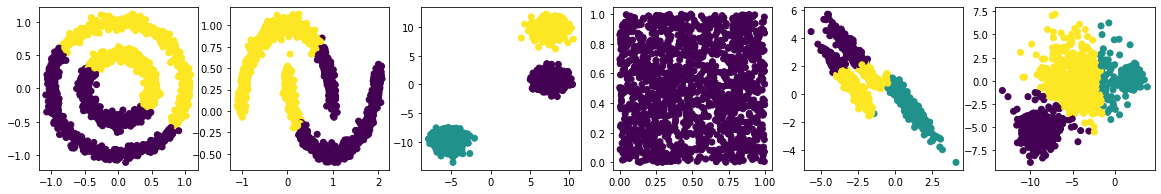

In [12]:
data = [A,B,C,D,E,F]
n_cluster = [2,2,3,1,3,3]
plt.figure(figsize=(20,3))

k = 0
for i in data:
    k+=1
    kmeans = KMeans(n_clusters=n_cluster[k-1], max_iter=300, init='k-means++', random_state=0).fit(i)
    plt.subplot(1,6,k)
    plt.scatter(i[:,0], i[:,1], c=kmeans.labels_)
plt.show()

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

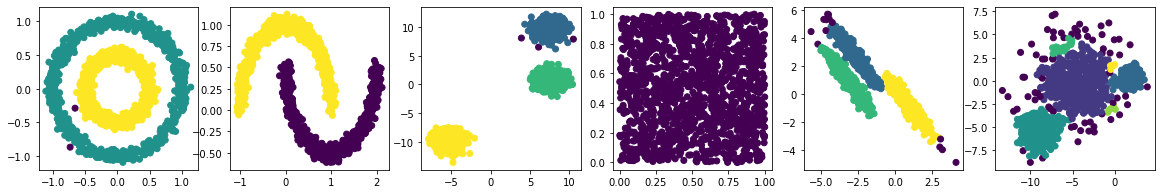

In [15]:
data = [A,B,C,D,E,F]
radius = [0.1,0.2,1,0.2,0.35,0.6]
plt.figure(figsize=(20,3))

k = 0
for i in data:
    k+=1
    dbscan = DBSCAN(eps=radius[k-1], min_samples=5).fit(i)
    labels = dbscan.labels_
    plt.subplot(1,6,k)
    plt.scatter(i[:,0], i[:,1], c=labels)
plt.show()